In [1]:
!pip install rasterio --quiet

#import required libraries
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
%matplotlib inline

<H3>Sea near Tampa, Florida was chosen with the assumption tha Tampa has popular beach so we should find some plastic litter</H3>

<H4>Data was manually downloaded for around time difference more than 1.5 years</H4>
<H5>Sentinel-hub query ( footprint:"Intersects(POLYGON((-84.08632809672467 27.96036015181072,-83.00120878951522 27.96036015181072,-83.00120878951522 28.85451959145996,-84.08632809672467 28.85451959145996,-84.08632809672467 27.96036015181072)))" ) AND ( beginPosition:[2020-01-01T00:00:00.000Z TO 2021-10-03T23:59:59.999Z] AND endPosition:[2020-01-01T00:00:00.000Z TO 2021-10-03T23:59:59.999Z] ) AND ( (platformname:Sentinel-2 AND producttype:S2MSI1C AND cloudcoverpercentage:[1 TO 5])) </H5>

In [323]:
#import bands as separate 1 band raster
#imagePath = 'S2A_MSIL1C_20200622T155911_N0209_R097_T17RKM_20200622T211519.SAFE/GRANULE/L1C_T17RKM_A026120_20200622T161006/IMG_DATA/T17RKM_20200622T155911_'
#imageStart = ""
imagePath = 'S2A_MSIL1C_20210121T161601_N0209_R140_T17RKM_20210121T181717.SAFE/GRANULE/L1C_T17RKM_A029166_20210121T162012/IMG_DATA/T17RKM_20210121T161601_'
#imagePath = 'S2B_MSIL1C_20210625T160829_N0300_R140_T17RKM_20210625T195243.SAFE/GRANULE/L1C_T17RKM_A022474_20210625T161738/IMG_DATA/T17RKM_20210625T160829_'

#imageStart = ""
band2 = rasterio.open(imagePath+'B02.jp2', driver='JP2OpenJPEG') #blue
band3 = rasterio.open(imagePath+'B03.jp2', driver='JP2OpenJPEG') #green
band4 = rasterio.open(imagePath+'B04.jp2', driver='JP2OpenJPEG') #red
band5 = rasterio.open(imagePath+'B05.jp2', driver='JP2OpenJPEG')
band8 = rasterio.open(imagePath+'B08.jp2', driver='JP2OpenJPEG') #nir
band11 = rasterio.open(imagePath+'B11.jp2', driver='JP2OpenJPEG') #nir

<H5>Downsampling to make the size small</H5>

In [347]:
oviews = band2.overviews(1)
oview = oviews[-1]
band2_d = band2.read(1, out_shape=(1, int(band2.height)//oview, int(band2.width)//oview)) #blue
oviews = band3.overviews(1)
oview = oviews[-1]
band3_d = band3.read(1, out_shape=(1, int(band3.height)//oview, int(band3.width)//oview)) #green

oviews = band5.overviews(1)
oview = oviews[-1]
band5_d = band5.read(1, out_shape=(1, int(band5.height)//oview, int(band5.width)//oview))

oviews = band11.overviews(1)
oview = oviews[-1]
band11_d = band11.read(1, out_shape=(1, int(band11.height)//oview, int(band11.width)//oview)) #nir

In [348]:
oviews = band4.overviews(1)
oview = oviews[-1]*2
band4_d = band4.read(1, out_shape=(1, int(band4.height)//oview, int(band4.width)//oview)) #red

In [349]:
oviews = band8.overviews(1)
oview = oviews[-1]*2
band8_d = band8.read(1, out_shape=(1, int(band8.height)//oview, int(band8.width)//oview)) #nir

In [350]:
def mean(a, n):
 
    # Calculating sum
    sum = 0;
    for i in range(n):
        for j in range(n):
            sum += a[i][j];
     
    # Returning mean
    return math.floor(int(sum / (n * n)));
 
# Function for calculating variance
def variance(a, n, m):
    sum = 0;
    for i in range(n):
        for j in range(n):
 
            # subtracting mean
            # from elements
            a[i][j] -= m;
 
            # a[i][j] = fabs(a[i][j]);
            # squaring each terms
            a[i][j] *= a[i][j];
 
    # taking sum
    for i in range(n):
        for j in range(n):
            sum += a[i][j];
 
    return math.floor(int(sum / (n * n)));

In [351]:
plt.rcParams['figure.figsize'] = [10, 8]

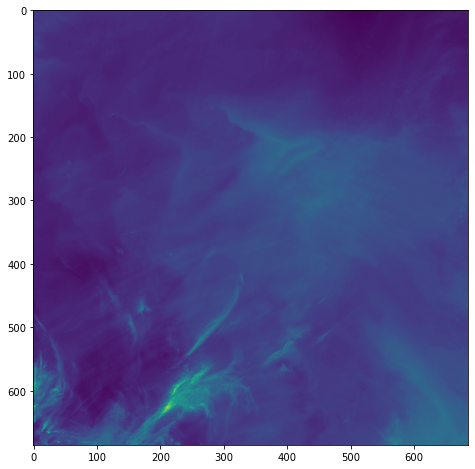

<AxesSubplot:>

In [356]:
plot.show(band2_d) #Visible spectrum - Blue band

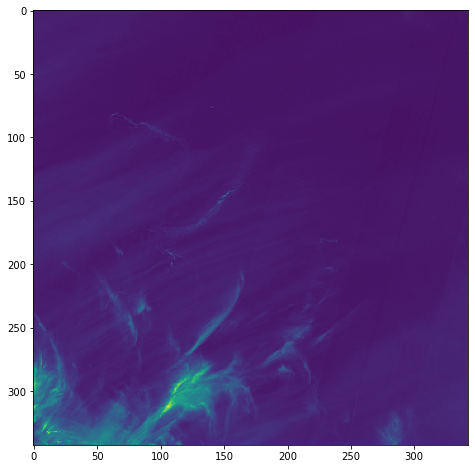

<AxesSubplot:>

In [357]:
plot.show(band11_d) #NIR band

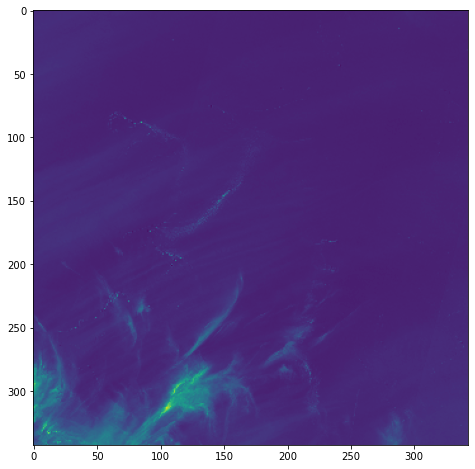

<AxesSubplot:>

In [358]:
plot.show(band8_d) #NIR band

<H5>From literature Survey we found that FDI (Floating Debris Index) 
and NDVI (Normalized Difference Vegetation Index) gives clear separation of plastic from other material like rock, plant, land, etc. <H5>

In [368]:
fdi = (band8_d -(band5_d + (band11_d - band5_d)*1.636));
ndvi =  (band8_d-band4_d)/(band8_d+band4_d);

#test code - ignore
#fdi = np.nan_to_num(fdi)
#ndvi = np.nan_to_num(ndvi)

In [369]:
import math 
#mean
m = mean(fdi, fdi.shape[0]);
# for variance
var = variance(fdi, fdi.shape[0], m);

In [370]:
# for standard deviation
dev = math.sqrt(var);
#Z normalization
fdi = (fdi - m)/dev
print(m, dev, var)

-106979 21.6794833886788 470


In [371]:
import math 

m = mean(ndvi, ndvi.shape[0]);
# for variance
var = variance(ndvi, ndvi.shape[0], m);
# for standard deviation
dev = math.sqrt(var);
ndvi = (ndvi - m)/dev

In [372]:
print(m, dev, var)

138 16.522711641858304 273


<H3>FDI Plot below shows the possible plastic presence</H3>

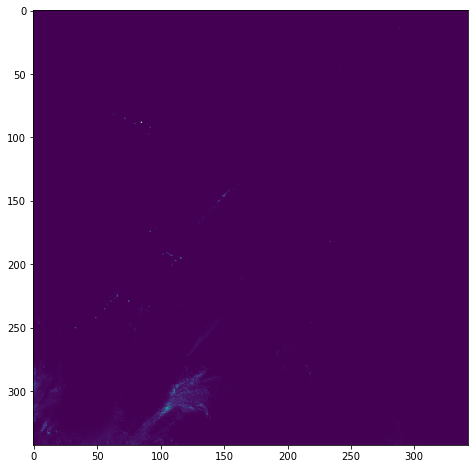

<AxesSubplot:>

In [342]:
plot.show(fdi)

<H5>Histogram is useful in analyzing the values distribution</H5>

(array([[329.,  10.,   4., ...,   0.,   0.,   0.],
        [329.,  13.,   1., ...,   0.,   0.,   0.],
        [341.,   2.,   0., ...,   0.,   0.,   0.],
        ...,
        [343.,   0.,   0., ...,   0.,   0.,   0.],
        [343.,   0.,   0., ...,   0.,   0.,   0.],
        [343.,   0.,   0., ...,   0.,   0.,   0.]]),
 array([ 4934.57334135,  6111.88517071,  7289.19700008,  8466.50882944,
         9643.82065881, 10821.13248817, 11998.44431754, 13175.7561469 ,
        14353.06797626, 15530.37980563, 16707.69163499]),
 <a list of 343 BarContainer objects>)

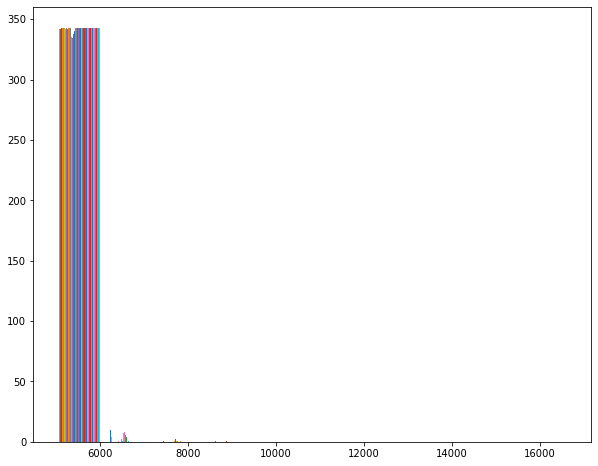

In [374]:
plt.hist(fdi)

<H5>NDVI Plot below also shows the possible plastic presence</H5>

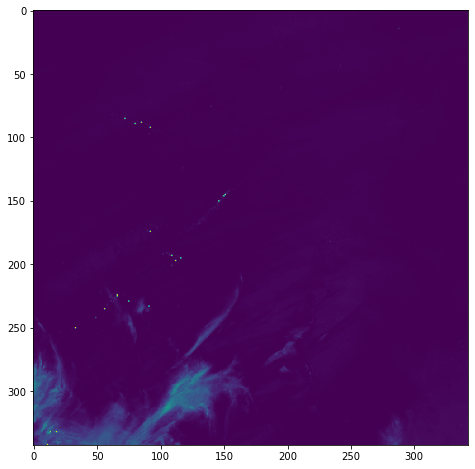

<AxesSubplot:>

In [376]:
plot.show(ndvi)

(array([[292.,   7.,  19., ...,   0.,   0.,   0.],
        [291.,   6.,  15., ...,   0.,   0.,   0.],
        [290.,  12.,  28., ...,   0.,   0.,   0.],
        ...,
        [343.,   0.,   0., ...,   0.,   0.,   0.],
        [343.,   0.,   0., ...,   0.,   0.,   0.],
        [343.,   0.,   0., ...,   0.,   0.,   0.]]),
 array([  -8.35213995,  106.90739137,  222.16692269,  337.42645401,
         452.68598533,  567.94551666,  683.20504798,  798.4645793 ,
         913.72411062, 1028.98364194, 1144.24317326]),
 <a list of 343 BarContainer objects>)

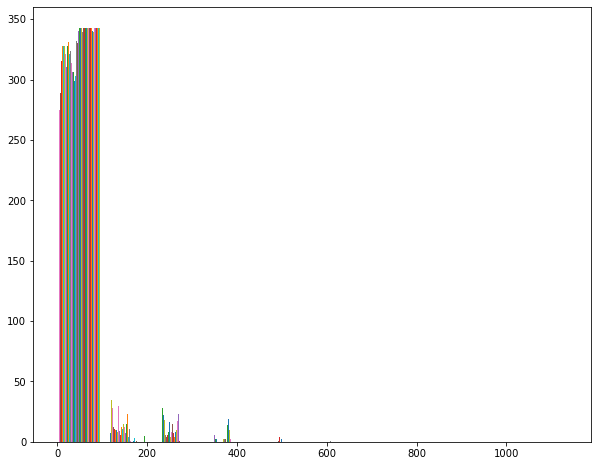

In [378]:
plt.hist(ndvi)

<H5>We tried Naive Bayes classification on the bands data with FDI, NDVI which is still under progress as we didn't have ground truth data
Machine Learning is planned to be used as following
<ol>
<li>
Automatically classify the pixel as plastic or not plastic using the features (12 bands + FDI + NDVI) combination or removal
</li>
<li>
Count the pixel of plastic in the area
to calculate the area = pixel_count * 10 * 10/1000 = km2
this will be used to tell the presensce of plastic and track it over a period of time.
</li>
<li>
This tracking can be shown on visualization software like Apache Superset (opensource) or Tableau
</li>

</H5>